# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Ваш код здесь
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data[['TV', 'Radio', 'Newspaper']].to_numpy() # Ваш код здесь
y = adver_data[['Sales']].to_numpy() # Ваш код здесь
print(X, y)

(array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [2

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means, stds = X.mean(axis=0), X.std(axis=0)
print(means, stds)
# Ваш код здесь

(array([147.0425,  23.264 ,  30.554 ]), array([85.63933176, 14.80964564, 21.72410606]))


In [7]:
X = (X - means)/stds# Ваш код здесь
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [10]:
import numpy as np
X = np.hstack((X, np.ones(X.shape[0])[:, np.newaxis]))
print(X)# Ваш код здесь

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.00000000e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01  1.00000000e+00]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00  1.00000000e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  1.00000000e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00  1.00000000e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00  1.00000000e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01  1.00000000e+00]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01  1.00000000e+00]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00  1.00000000e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01  1.00000000e+00]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01  1.00000000e+00]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00  1.00000000e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00  1.00000000e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00  1.00000000e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01  1.00000000e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [11]:
def mserror(y, y_pred):
    # Ваш код здесь
    return sum((y - y_pred) ** 2) / len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [14]:
y_pred_naive = np.array([np.median(y) for i in range(len(y))])[:, np.newaxis]
print(y_pred_naive)
answer1 = mserror(y, y_pred_naive)
print(answer1)
write_answer_to_file(answer1, '1.txt')

[[12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]
 [12.9]


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [15]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)  # Ваш код здесь

In [16]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [17]:
answer2 = np.dot(np.array([0, 0, 0, 1])[np.newaxis, :], norm_eq_weights)# Ваш код здесь
print(answer2)
write_answer_to_file(answer2, '2.txt')

[[14.0225]]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [18]:
def linear_prediction(X, w):
    return np.dot(X, w)
    # Ваш код здесь

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [20]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights)) # Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

[2.78412631]


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [41]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    L = len(y)
    grad0 = 2 * X[train_ind][0] * (np.dot(X[train_ind], w) - y[train_ind]) / L # Ваш код здесь
    grad1 = 2 * X[train_ind][1] * (np.dot(X[train_ind], w) - y[train_ind]) / L # Ваш код здесь
    grad2 = 2 * X[train_ind][2] * (np.dot(X[train_ind], w) - y[train_ind]) / L  # Ваш код здесь
    grad3 = 2 * X[train_ind][3] * (np.dot(X[train_ind], w) - y[train_ind]) / L # Ваш код здесь
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [42]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        if verbose:
            print(w)
        random_ind = np.random.randint(X.shape[0])
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        if verbose:
            print(new_w)
        iter_num += 1
        weight_dist = np.linalg.norm(w - new_w, ord=2)
        errors.append(mserror(y, linear_prediction(X, new_w)))
        w = new_w
        # Ваш код здесь
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [44]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter =  stochastic_gradient_descent(X, 
                                                                             y, 
                                                                             np.array([0, 0, 0, 0])[:, np.newaxis], max_iter=100000)  
print(stoch_grad_desc_weights, stoch_errors_by_iter)    # Ваш код здесь

(array([[ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03],
       [ 1.40190566e+01]]), [array([223.665389]), array([223.63640485]), array([223.5549101]), array([223.48076245]), array([223.47256427]), array([223.44655232]), array([223.39175145]), array([223.32145218]), array([223.27074621]), array([223.25857464]), array([223.20263393]), array([223.14642465]), array([223.11828656]), array([223.05639626]), array([223.01523255]), array([222.99035058]), array([222.9874142]), array([222.96901771]), array([222.87192976]), array([222.84459488]), array([222.78857274]), array([222.76972781]), array([222.72086214]), array([222.70490417]), array([222.69156394]), array([222.63455887]), array([222.56452773]), array([222.52385945]), array([222.49253589]), array([222.45710958]), array([222.421211]), array([222.37014375]), array([222.2623511]), array([222.21264479]), array([222.15575839]), array([222.08211118]), array([222.07508647]), array([222.06806833]), array([222.03924335]), ar

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

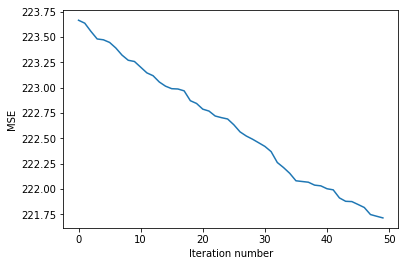

In [45]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

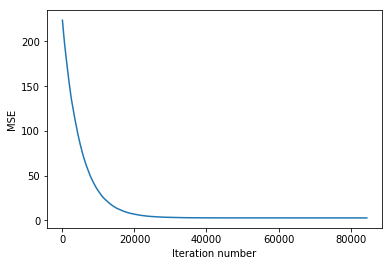

In [46]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [47]:
stoch_grad_desc_weights

array([[ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03],
       [ 1.40190566e+01]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [48]:
stoch_errors_by_iter[-1]

array([2.78441259])

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [49]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.7844125884067044


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**